In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
cen_con = get_con()

In [3]:
constr_tracts = pd.read_csv("constructed_vars.csv", index_col = "tract")

In [4]:
tract_geom = gpd.read_postgis("SELECT state, county, geoid tract, ST_Transform(geomsimp, 3528) geom "
                              "FROM census_tracts_2018 WHERE state IN (17, 18, 26, 55);",
                              geom_col = "geom", crs = "EPSG:3528", 
                              index_col = "tract", con = cen_con)

constr_g = tract_geom.join(constr_tracts)

In [5]:
constr_tracts.columns

Index(['max_dn', 'max_up', 'dn10', 'dn100', 'dn250', 'fiber_100u'], dtype='object')

<AxesSubplot:>

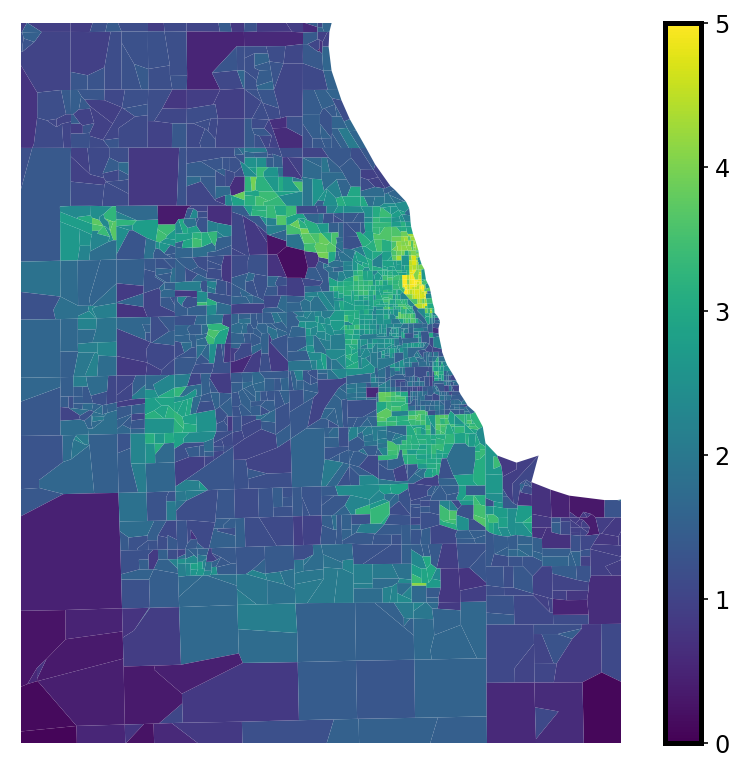

In [6]:
ax = constr_g.plot(column = "dn100", vmax = 5, #vmax = 1000, 
                     figsize = (6, 5), legend = True)

ax.set_xlim(2.9e5, 3.9e5)
ax.set_ylim(5.1e5, 6.3e5)
map_format(ax)

<AxesSubplot:>

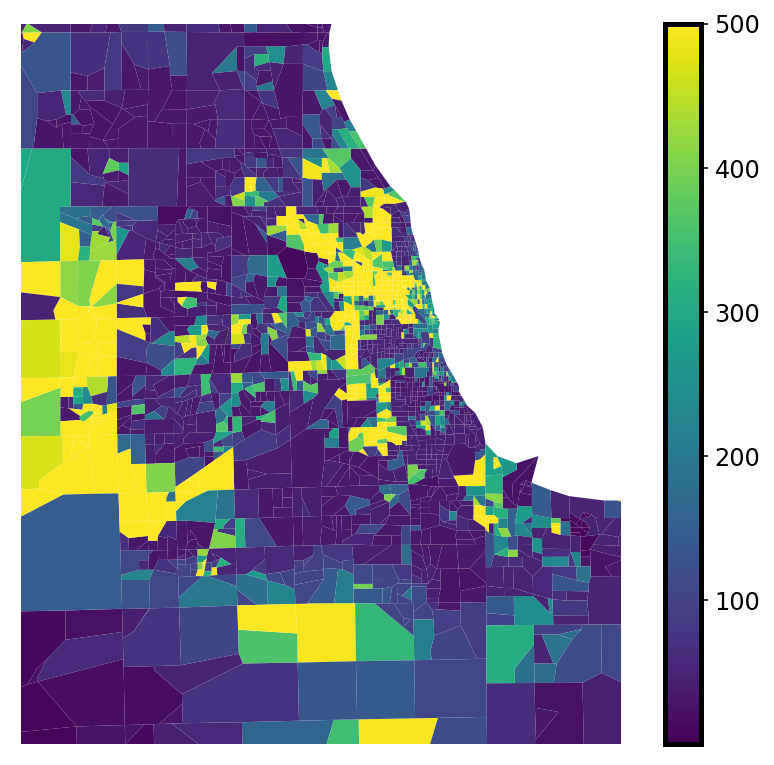

In [7]:
ax = constr_g.plot(column = "max_up", vmax = 500, 
                     figsize = (6, 5), legend = True)

ax.set_xlim(2.9e5, 3.9e5)
ax.set_ylim(5.1e5, 6.3e5)
map_format(ax)

<AxesSubplot:>

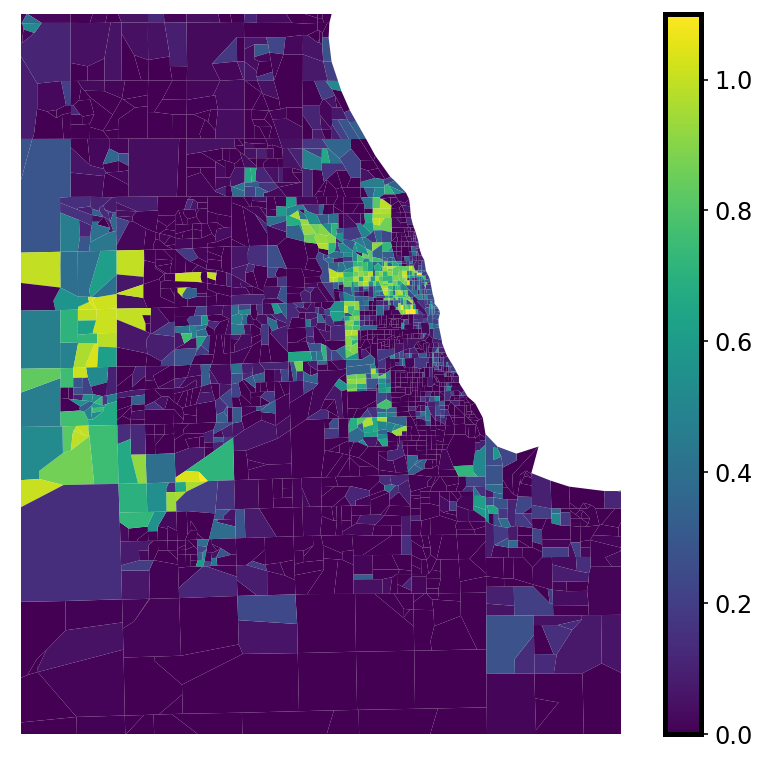

In [9]:
ax = constr_g.plot(column = "fiber_100u", vmax = 1.1,  figsize = (6, 5), legend = True)

ax.set_xlim(2.9e5, 3.9e5)
ax.set_ylim(5.1e5, 6.3e5)
map_format(ax)